#Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("clean.csv")

In [0]:
def data_aggregate():
    # Read loaded dataset
    df = new_df1

    print("<---------------Plot Num------------------>")
    plt.figure(figsize=(10,5))
    sns.countplot(y="num", hue="sex", data=df)
    plt.show()
    
    # Num col can be Aggregated & Renamed to target.
    target_val = df['num'] > 0
    df.loc[target_val, 'num'] = 1
    df.rename(columns={'num':'target'}, inplace=True)
    
    print("<---------------Plot Target---------------->")
    plt.figure(figsize=(10,5))
    sns.countplot(y="target", hue="sex", data=df)
    plt.show()

    return df   

<---------------Plot Num------------------>


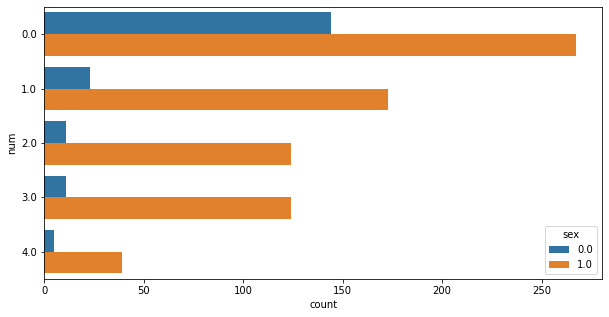

<---------------Plot Target---------------->


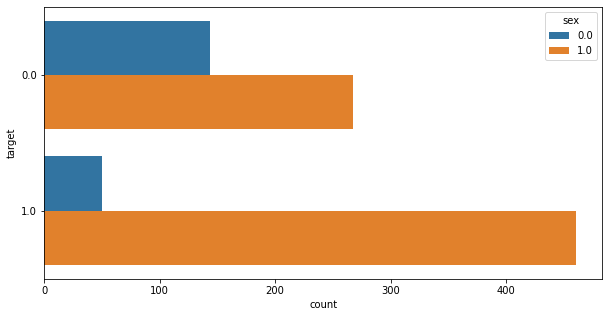

In [4]:
# Aggregate
new_df1 = df
df = data_aggregate()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       921 non-null    float64
 1   sex       921 non-null    float64
 2   cp        921 non-null    float64
 3   trestbps  921 non-null    float64
 4   chol      921 non-null    float64
 5   fbs       921 non-null    float64
 6   restecg   921 non-null    float64
 7   thalach   921 non-null    float64
 8   exang     921 non-null    float64
 9   oldpeak   921 non-null    float64
 10  slope     921 non-null    float64
 11  ca        921 non-null    float64
 12  thal      921 non-null    float64
 13  target    921 non-null    float64
dtypes: float64(14)
memory usage: 100.9 KB


In [0]:
def data_correlation():
    # Read loaded dataset
    df = new_df2

    # Finding the correlation of the dataset 
    correlations = df.corr()['target'].drop('target')
    print(correlations)

    # Function - Get features > treshold
    def get_features(correlation_threshold):
        abs_corrs = correlations.abs()
        high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
        return high_correlations

    # Corr > 0.25
    features = get_features(+0.25) 
    print(features) 
    x = df[features] 
    y = df['target']

    #Heatmap of Corr
    print("\n")
    print("<---------------Heatmap------------------>")
    plt.figure(figsize=(10,5))
    sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
    plt.show()

    return df

age         0.282576
sex         0.307609
cp          0.471505
trestbps    0.102877
chol       -0.226367
fbs         0.223320
restecg     0.068523
thalach    -0.382775
exang       0.449836
oldpeak     0.395790
slope       0.264587
ca          0.222358
thal        0.340904
Name: target, dtype: float64
['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'thal']


<---------------Heatmap------------------>


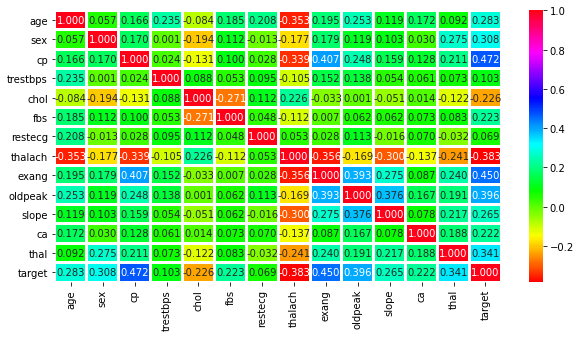

In [7]:
# Correlation 
new_df2 = df

df = data_correlation()

In [0]:
# Columns with higest correlation.
#['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'thal']

featured_df= df.loc[:, ['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'thal']]


In [0]:
featured_df.to_csv('featured.csv', index = False, header=True)

End of Checkpoint 3